This notebook demostrates the creation of some Extensive Form Games (EFGs), all of them versions of the Iterated Prisoner's Dilemma game, from the Prolog description of an action situation according to the syntax of *if-then-where* rules.

In [1]:
import sys
from pathlib import Path
path = str(Path.cwd().parent.parent.absolute())
sys.path.append(path)

In [2]:
from ngames.extensivegames import plot_game
from ngames.build import build_full_game
from ngames.equilibrium import minimize_incentives, \
    subgame_perfect_equilibrium, outcome_probability
import matplotlib.pyplot as plt

# Default rules

Agent are allowed to cooperate and defect whenever.

In [3]:
game_ipd_default = build_full_game('.', 'ipd', 0)

In [4]:
import re

def assign_utilities(G):
    for z in G.game_tree.terminal_nodes:
        utility = {}
        fluents = G.state_fluents[z]
        for f in fluents:
            parsed_f = re.split('\(|,|\)', f)
            if parsed_f[0] == 'payoff':
                player = parsed_f[1]
                u = float(parsed_f[2])
                utility[player] = u
        G.set_utility(z,utility)
            
assign_utilities(game_ipd_default)

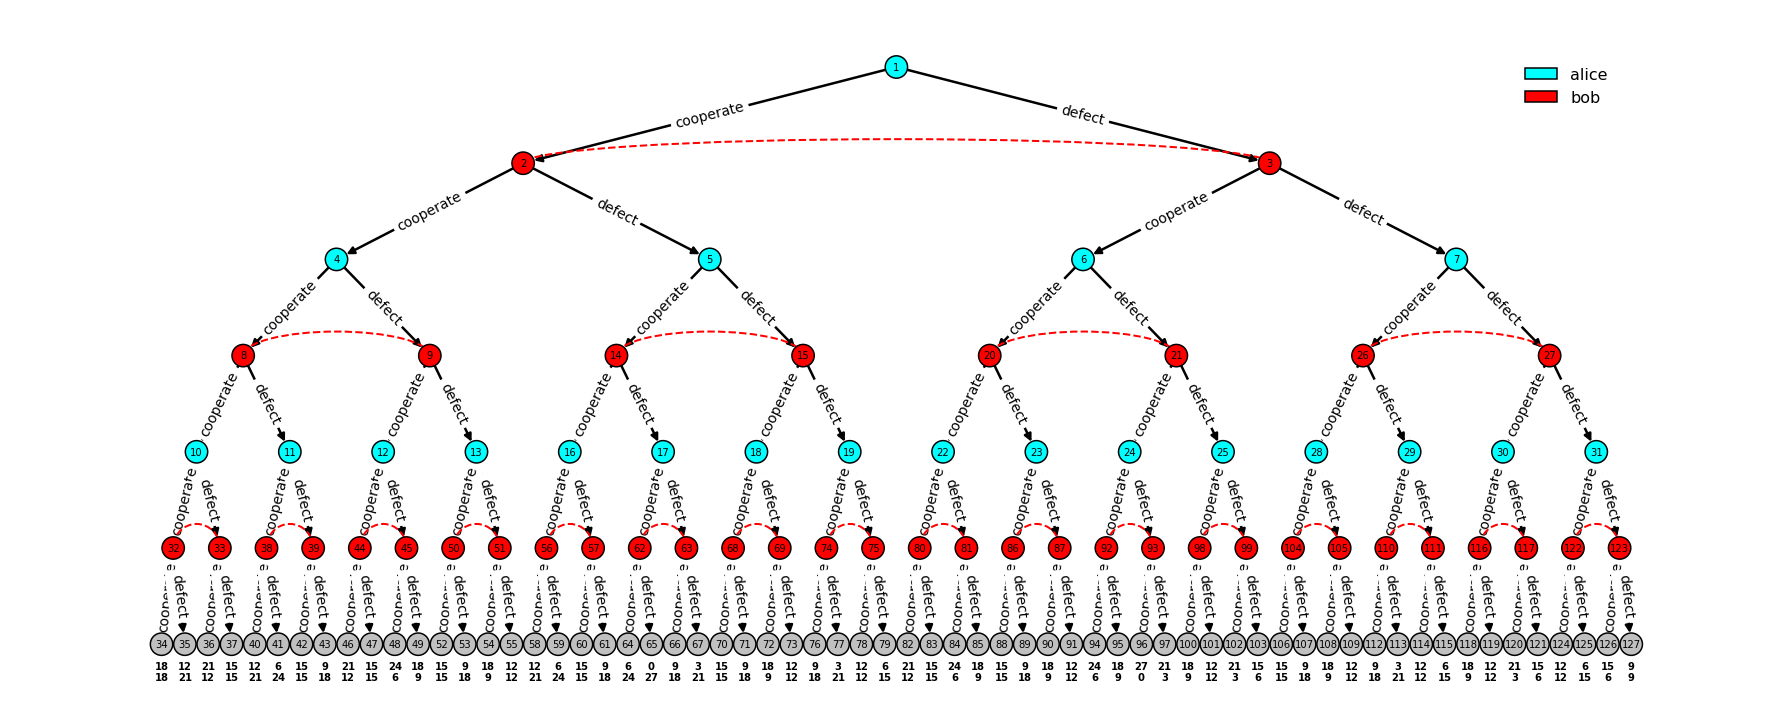

In [5]:
position_colors = {'alice': 'cyan', 'bob': 'red'}

# default keywords for rendering the figure
my_fig_kwargs = dict(figsize=(25, 10), frameon=False, tight_layout=True)
my_node_kwargs = dict(font_size=10, node_size=500, edgecolors='k',
                      linewidths=1.5)
my_edge_kwargs = dict(arrowsize=15, width=2.5)
my_edge_labels_kwargs = dict(font_size=14)
my_patch_kwargs = dict(linewidth=1.5)
my_legend_kwargs = dict(fontsize=16, loc=(0.85, 0.85), edgecolor='white')
my_utility_label_kwargs = dict(horizontalalignment='center', fontsize=10,
                               weight='bold')
my_info_sets_kwargs = dict(linestyle='--', linewidth=2)

fig = plot_game(game_ipd_default, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                decimals=0,
                utility_label_shift=0.08,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig("/home/nmontes/OneDrive/Documentos/PhD/ASL-paper/ipd_default.png", dpi=400)

In [6]:
subgame_mixed_strat, back_utilities, incentives = \
    subgame_perfect_equilibrium(game_ipd_default, minimize_incentives)

for node, mixed_strategy_profile in subgame_mixed_strat.items():
    print("At node {}: f(s)={:.3f}".format(node, incentives[node]))
    for player, player_strat in mixed_strategy_profile.items():
        print("{}: {}".format(player, player_strat))
    print(back_utilities[node])
    print()

At node 10: f(s)=0.000
alice: {'cooperate': 1.6653345369377348e-15, 'defect': 0.9999999999999984}
bob: {'cooperate': 0.0, 'defect': 1.0}
{'alice': 14.999999999999996, 'bob': 15.000000000000012}

At node 11: f(s)=0.000
alice: {'cooperate': 4.218847493575595e-15, 'defect': 0.9999999999999958}
bob: {'cooperate': 0.0, 'defect': 1.0}
{'alice': 8.999999999999988, 'bob': 18.00000000000003}

At node 12: f(s)=0.000
alice: {'cooperate': 3.1086244689504383e-15, 'defect': 0.9999999999999969}
bob: {'cooperate': 1.1268763699945339e-14, 'defect': 0.9999999999999889}
{'alice': 18.00000000000006, 'bob': 8.999999999999986}

At node 13: f(s)=0.000
alice: {'cooperate': 5.434541705540141e-14, 'defect': 0.9999999999999457}
bob: {'cooperate': 4.446443213623752e-14, 'defect': 0.9999999999999557}
{'alice': 12.000000000000107, 'bob': 12.000000000000195}

At node 16: f(s)=0.000
alice: {'cooperate': 4.218847493575595e-15, 'defect': 0.9999999999999958}
bob: {'cooperate': 0.0, 'defect': 1.0}
{'alice': 8.99999999999

In [7]:
# compute the probability distribution over terminal nodes induced by the
# strategy
outcome_prob = {t: outcome_probability(game_ipd_default,
                                       subgame_mixed_strat, t)
                for t in game_ipd_default.game_tree.terminal_nodes}

for n, p in outcome_prob.items():
    if p > 1.E-5:
        print("{} -- {}".format(n, p))
        print(game_ipd_default.state_fluents[n])
        print()

127 -- 1.0
['consecutiveDefections(bob, 0)', 'consecutiveDefections(alice, 0)', 'payoff(bob, 9.0)', 'payoff(alice, 9.0)', 'rounds(3.0)']



# Limit consecutive defections

Agent are not allowed to defect more than twice in a row.

In [8]:
game_ipd_limit_defections = build_full_game('.', 'ipd', 1)
assign_utilities(game_ipd_limit_defections)

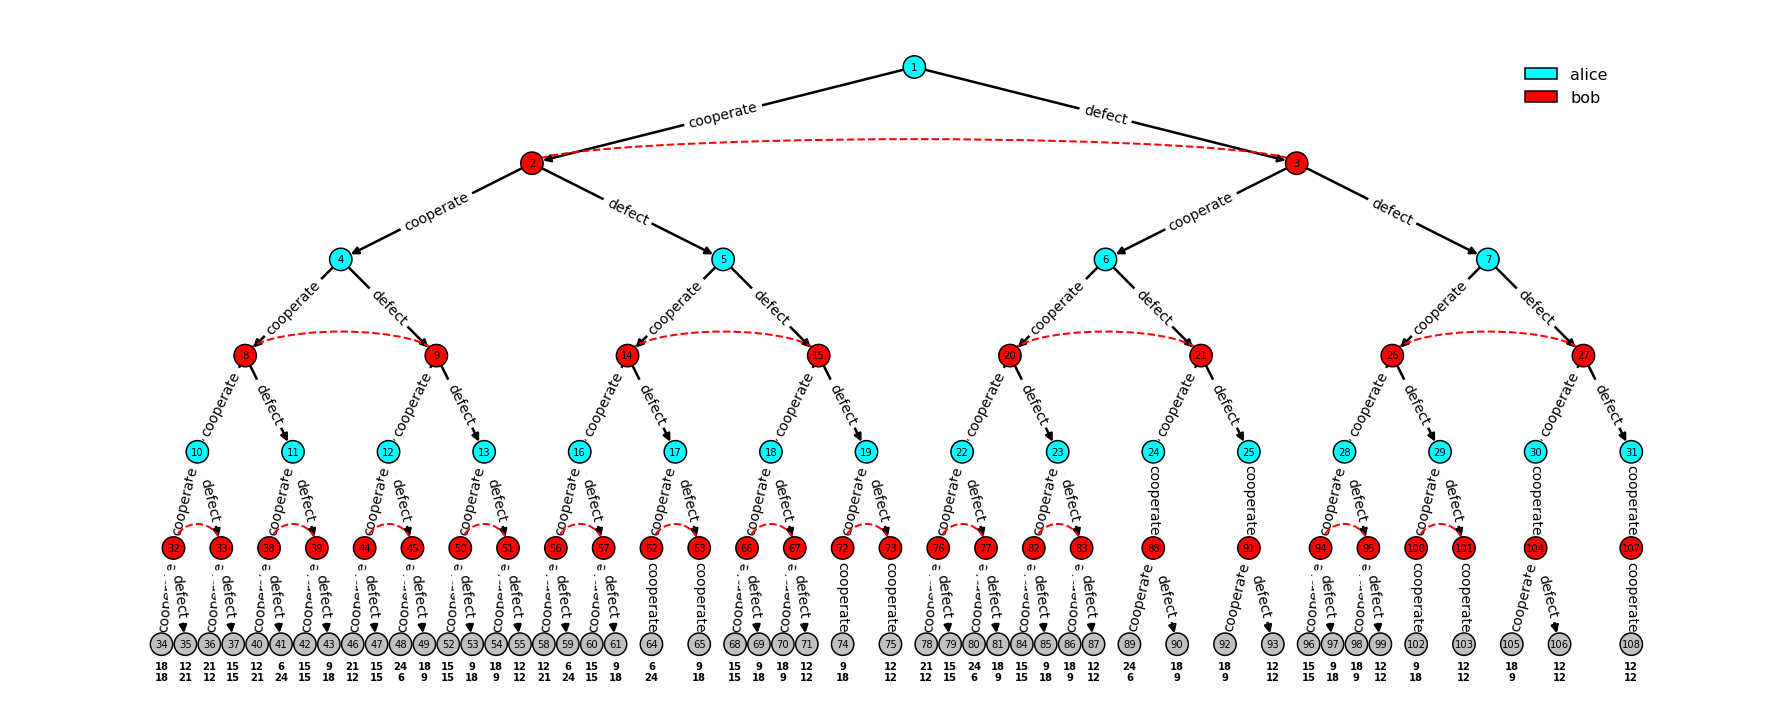

In [9]:
fig = plot_game(game_ipd_limit_defections, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                decimals=0,
                utility_label_shift=0.08,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig("/home/nmontes/OneDrive/Documentos/PhD/ASL-paper/ipd_limit_defections.png", dpi=400)

In [10]:
subgame_mixed_strat, back_utilities, incentives = \
    subgame_perfect_equilibrium(game_ipd_limit_defections,
                                minimize_incentives)

for node, mixed_strategy_profile in subgame_mixed_strat.items():
    print("At node {}: f(s)={:.3f}".format(node, incentives[node]))
    for player, player_strat in mixed_strategy_profile.items():
        print("{}: {}".format(player, player_strat))
    print(back_utilities[node])
    print()

At node 10: f(s)=0.000
alice: {'cooperate': 1.6653345369377348e-15, 'defect': 0.9999999999999984}
bob: {'cooperate': 0.0, 'defect': 1.0}
{'alice': 14.999999999999996, 'bob': 15.000000000000012}

At node 11: f(s)=0.000
alice: {'cooperate': 4.218847493575595e-15, 'defect': 0.9999999999999958}
bob: {'cooperate': 0.0, 'defect': 1.0}
{'alice': 8.999999999999988, 'bob': 18.00000000000003}

At node 12: f(s)=0.000
alice: {'cooperate': 3.1086244689504383e-15, 'defect': 0.9999999999999969}
bob: {'cooperate': 1.1268763699945339e-14, 'defect': 0.9999999999999889}
{'alice': 18.00000000000006, 'bob': 8.999999999999986}

At node 13: f(s)=0.000
alice: {'cooperate': 5.434541705540141e-14, 'defect': 0.9999999999999457}
bob: {'cooperate': 4.446443213623752e-14, 'defect': 0.9999999999999557}
{'alice': 12.000000000000107, 'bob': 12.000000000000195}

At node 16: f(s)=0.000
alice: {'cooperate': 4.218847493575595e-15, 'defect': 0.9999999999999958}
bob: {'cooperate': 0.0, 'defect': 1.0}
{'alice': 8.99999999999

In [11]:
# compute the probability distribution over terminal nodes induced by the
# strategy
outcome_prob = {t: outcome_probability(game_ipd_limit_defections,
                                       subgame_mixed_strat, t)
                for t in game_ipd_limit_defections.game_tree.terminal_nodes}

for n, p in outcome_prob.items():
    if p > 1.E-5:
        print("{} -- {}".format(n, p))
        print(game_ipd_limit_defections.state_fluents[n])
        print()

55 -- 0.2499999999999507
['consecutiveDefections(bob, 2.0)', 'consecutiveDefections(alice, 2.0)', 'payoff(bob, 12.0)', 'payoff(alice, 12.0)', 'rounds(3.0)']

71 -- 0.12499999999998923
['consecutiveDefections(bob, 1.0)', 'consecutiveDefections(alice, 2.0)', 'payoff(bob, 12.0)', 'payoff(alice, 12.0)', 'rounds(3.0)']

75 -- 0.12499999999999795
['consecutiveDefections(bob, 0)', 'consecutiveDefections(alice, 2.0)', 'payoff(alice, 12.0)', 'payoff(bob, 12.0)', 'rounds(3.0)']

87 -- 0.12499999999998507
['consecutiveDefections(bob, 2.0)', 'consecutiveDefections(alice, 1.0)', 'payoff(bob, 12.0)', 'payoff(alice, 12.0)', 'rounds(3.0)']

93 -- 0.1250000000000026
['consecutiveDefections(alice, 0)', 'consecutiveDefections(bob, 2.0)', 'payoff(bob, 12.0)', 'payoff(alice, 12.0)', 'rounds(3.0)']

99 -- 0.06249999999999384
['consecutiveDefections(bob, 1.0)', 'consecutiveDefections(alice, 1.0)', 'payoff(bob, 12.0)', 'payoff(alice, 12.0)', 'rounds(3.0)']

103 -- 0.0625
['consecutiveDefections(bob, 0)', 'con

# Penalize mutual defection

If both agents defect, the outcome is *as if* one agent had defected on the other. The agent that acts as the defector is selected randomly.

The generated game for this configuration is limited to 2 rounds.

In [12]:
game_ipd_ban_mutual_defect = build_full_game('.', 'ipd', 2, max_rounds=2)
assign_utilities(game_ipd_ban_mutual_defect)

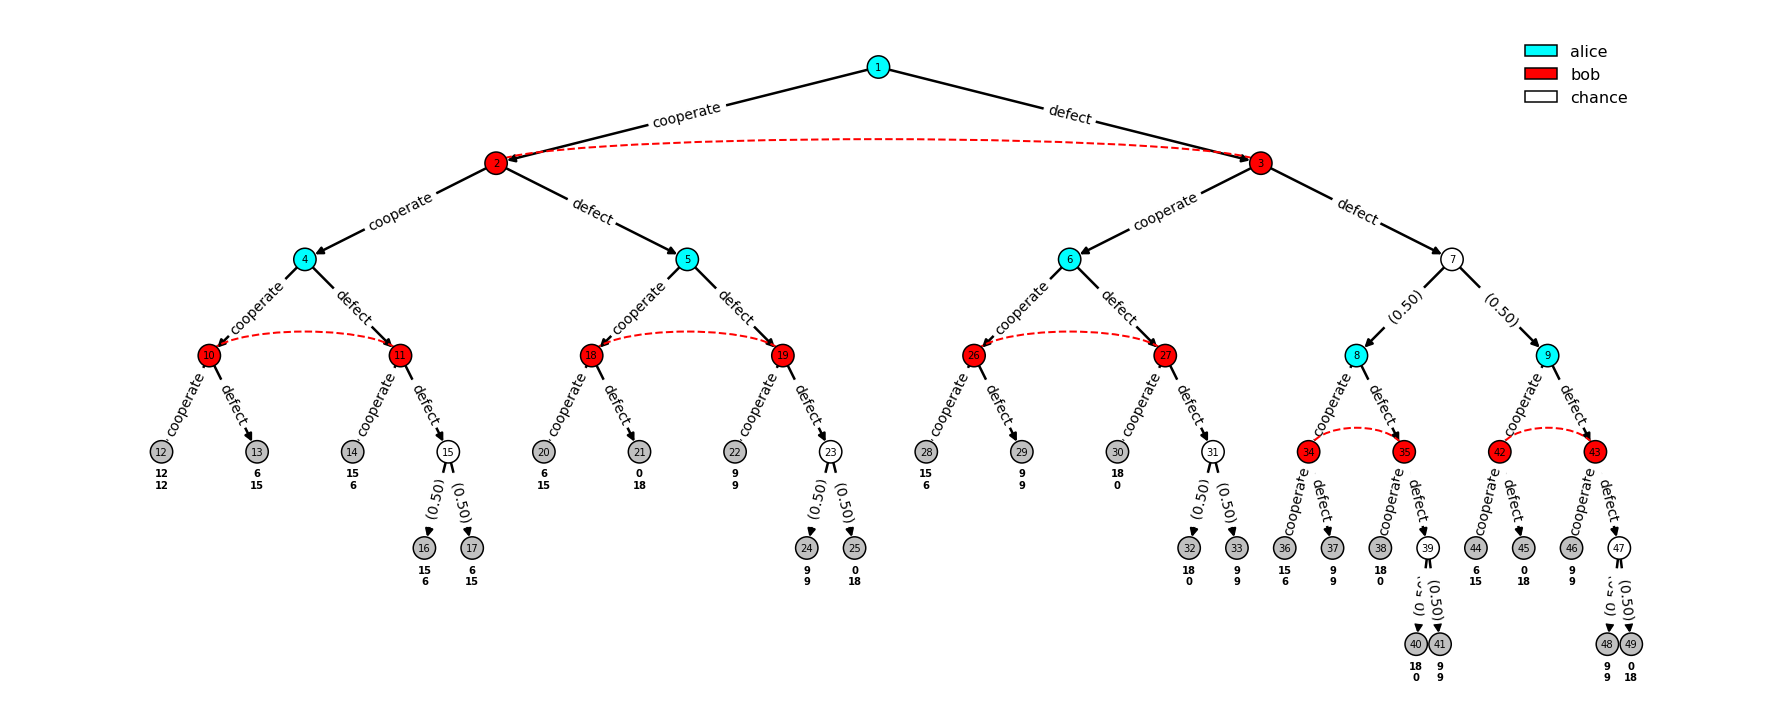

In [13]:
fig = plot_game(game_ipd_ban_mutual_defect, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                decimals=0,
                utility_label_shift=0.08,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig("/home/nmontes/OneDrive/Documentos/PhD/ASL-paper/ipd_ban_mutual_defection.png", dpi=400)

In [14]:
subgame_mixed_strat, back_utilities, incentives = \
    subgame_perfect_equilibrium(game_ipd_ban_mutual_defect,
                                minimize_incentives)

for node, mixed_strategy_profile in subgame_mixed_strat.items():
    print("At node {}: f(s)={:.3f}".format(node, incentives[node]))
    for player, player_strat in mixed_strategy_profile.items():
        print("{}: {}".format(player, player_strat))
    print(back_utilities[node])
    print()

At node 4: f(s)=0.000
alice: {'cooperate': 8.326672684688674e-16, 'defect': 0.9999999999999991}
bob: {'cooperate': 0.0, 'defect': 1.0}
{'alice': 10.499999999999996, 'bob': 10.500000000000004}

At node 5: f(s)=0.000
alice: {'cooperate': 1.7319479184152442e-14, 'defect': 0.9999999999999827}
bob: {'cooperate': 2.0261570199409107e-14, 'defect': 0.99999999999998}
{'alice': 4.500000000000014, 'bob': 13.49999999999999}

At node 6: f(s)=0.000
alice: {'cooperate': 2.5590640717609858e-14, 'defect': 0.9999999999999745}
bob: {'cooperate': 4.035660694512444e-14, 'defect': 0.9999999999999598}
{'alice': 13.50000000000007, 'bob': 4.499999999999934}

At node 8: f(s)=0.000
alice: {'cooperate': 2.5590640717609858e-14, 'defect': 0.9999999999999745}
bob: {'cooperate': 4.035660694512444e-14, 'defect': 0.9999999999999598}
{'alice': 13.50000000000007, 'bob': 4.499999999999934}

At node 9: f(s)=0.000
alice: {'cooperate': 1.7319479184152442e-14, 'defect': 0.9999999999999827}
bob: {'cooperate': 2.026157019940910

In [15]:
# compute the probability distribution over terminal nodes induced by the
# strategy
outcome_prob = {t: outcome_probability(game_ipd_ban_mutual_defect,
                                       subgame_mixed_strat, t)
                for t in game_ipd_ban_mutual_defect.game_tree.terminal_nodes}

for n, p in outcome_prob.items():
    if p > 1.E-5:
        print("{} -- {}".format(n, p))
        print(game_ipd_ban_mutual_defect.state_fluents[n])
        print()

40 -- 0.24999999999998357
['consecutiveDefections(alice, 2.0)', 'consecutiveDefections(bob, 2.0)', 'payoff(alice, 18.0)', 'payoff(bob, 0.0)', 'rounds(2.0)']

41 -- 0.24999999999998357
['consecutiveDefections(alice, 2.0)', 'consecutiveDefections(bob, 2.0)', 'payoff(alice, 9.0)', 'payoff(bob, 9.0)', 'rounds(2.0)']

48 -- 0.24999999999999067
['consecutiveDefections(alice, 2.0)', 'consecutiveDefections(bob, 2.0)', 'payoff(alice, 9.0)', 'payoff(bob, 9.0)', 'rounds(2.0)']

49 -- 0.24999999999999067
['consecutiveDefections(alice, 2.0)', 'consecutiveDefections(bob, 2.0)', 'payoff(alice, 0.0)', 'payoff(bob, 18.0)', 'rounds(2.0)']

